# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library


In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}&appid={weather_api_key}&units={units}&q={city}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
 

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']
        city_lng = city_weather["coord"]['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cozumel
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | krasnoborsk
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | nakamura
Processing Record 7 of Set 1 | sao filipe
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | viesca
Processing Record 11 of Set 1 | tuatapere
Processing Record 12 of Set 1 | colares
Processing Record 13 of Set 1 | mayo
Processing Record 14 of Set 1 | salalah
Processing Record 15 of Set 1 | chaa-khol
City not found. Skipping...
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | chokurdakh
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | sabang
Processing Record 21 of Set 1 | monduli
Processing Record 22 

Processing Record 38 of Set 4 | geraldton
Processing Record 39 of Set 4 | santa rosa
Processing Record 40 of Set 4 | barrow
Processing Record 41 of Set 4 | stephenville
Processing Record 42 of Set 4 | lolua
City not found. Skipping...
Processing Record 43 of Set 4 | gardan diwal
City not found. Skipping...
Processing Record 44 of Set 4 | chumikan
Processing Record 45 of Set 4 | shelburne
Processing Record 46 of Set 4 | mut
Processing Record 47 of Set 4 | inhambane
Processing Record 48 of Set 4 | lakes entrance
Processing Record 49 of Set 4 | yunjinghong
City not found. Skipping...
Processing Record 0 of Set 5 | berovo
Processing Record 1 of Set 5 | muros
Processing Record 2 of Set 5 | ust-kamchatsk
City not found. Skipping...
Processing Record 3 of Set 5 | tibati
Processing Record 4 of Set 5 | katyuzhanka
Processing Record 5 of Set 5 | ciudad bolivar
Processing Record 6 of Set 5 | zhuanghe
Processing Record 7 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set

Processing Record 25 of Set 8 | mount gambier
Processing Record 26 of Set 8 | kon tum
Processing Record 27 of Set 8 | thinadhoo
Processing Record 28 of Set 8 | katobu
Processing Record 29 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 30 of Set 8 | ittiri
Processing Record 31 of Set 8 | pervomayskiy
Processing Record 32 of Set 8 | rocha
Processing Record 33 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 34 of Set 8 | pitimbu
Processing Record 35 of Set 8 | saint-michel-des-saints
Processing Record 36 of Set 8 | nouadhibou
Processing Record 37 of Set 8 | redmond
Processing Record 38 of Set 8 | kayerkan
Processing Record 39 of Set 8 | inta
Processing Record 40 of Set 8 | vagur
Processing Record 41 of Set 8 | kununurra
Processing Record 42 of Set 8 | warrnambool
Processing Record 43 of Set 8 | woodward
Processing Record 44 of Set 8 | nemea
Processing Record 45 of Set 8 | keetmanshoop
Processing Record 46 of Set 8 | hami
Processing Record 47 of S

Processing Record 14 of Set 12 | el cobre
Processing Record 15 of Set 12 | ketchikan
Processing Record 16 of Set 12 | malishka
Processing Record 17 of Set 12 | leeton
Processing Record 18 of Set 12 | sao joao do piaui
Processing Record 19 of Set 12 | phek
Processing Record 20 of Set 12 | dwarka
Processing Record 21 of Set 12 | darasun
Processing Record 22 of Set 12 | valparaiso
Processing Record 23 of Set 12 | touros
Processing Record 24 of Set 12 | weilburg
Processing Record 25 of Set 12 | puerto escondido
Processing Record 26 of Set 12 | porto novo
Processing Record 27 of Set 12 | asyut
Processing Record 28 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 29 of Set 12 | ntchisi
Processing Record 30 of Set 12 | dongying
Processing Record 31 of Set 12 | atar
Processing Record 32 of Set 12 | harper
Processing Record 33 of Set 12 | aljezur
Processing Record 34 of Set 12 | labuhan
Processing Record 35 of Set 12 | hasaki
Processing Record 36 of Set 12 | ola
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cozumel,20.5083,-86.9458,80.08,88,40,8.01,MX,1675608483
1,hermanus,-34.4187,19.2345,67.80,81,100,8.30,ZA,1675608499
2,georgetown,5.4112,100.3354,75.15,94,40,4.61,MY,1675608281
3,krasnoborsk,61.5598,45.9340,0.72,100,88,1.41,RU,1675608500
4,tuktoyaktuk,69.4541,-133.0374,-47.20,66,0,3.44,CA,1675608501


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cozumel,20.5083,-86.9458,80.08,88,40,8.01,MX,1675608483
1,hermanus,-34.4187,19.2345,67.80,81,100,8.30,ZA,1675608499
2,georgetown,5.4112,100.3354,75.15,94,40,4.61,MY,1675608281
3,krasnoborsk,61.5598,45.9340,0.72,100,88,1.41,RU,1675608500
4,tuktoyaktuk,69.4541,-133.0374,-47.20,66,0,3.44,CA,1675608501


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

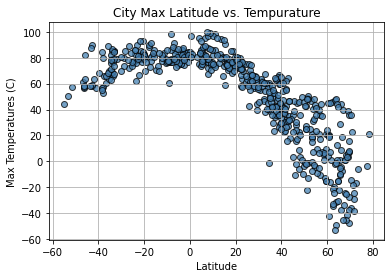

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="steelblue", edgecolor="black" , alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Tempurature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperatures (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

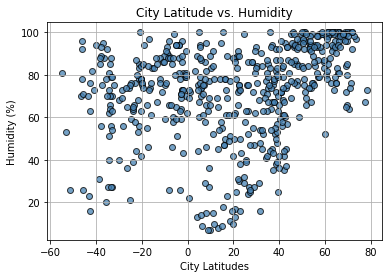

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="steelblue", edgecolor="black" , alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity")
plt.xlabel("City Latitudes")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

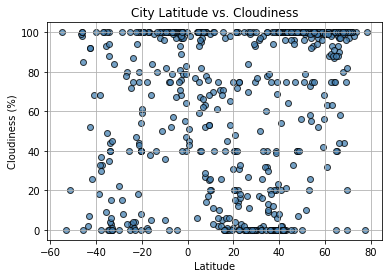

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="steelblue", edgecolor="black" , alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

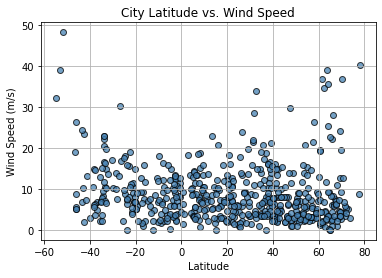

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="steelblue", edgecolor="black" , alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def lr_plot():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regression = x_value * slope + intercept
    line_eq_coor = ( xc, yc)

    line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
    plt.scatter(x_value, y_value, marker='o', color='steelblue', edgecolors='black')
    plt.plot(x_value, regression, color='red', linewidth=3)
    plt.annotate(line_eq, line_eq_coor, fontsize=16, color="red")
    plt.grid(True)
    print(f"The r-value is: {rvalue}")
    
   

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
norhem_df = city_data_df[(city_data_df["Lat"] >= 0)]
# Display sample data
norhem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cozumel,20.5083,-86.9458,80.08,88,40,8.01,MX,1675608483
2,georgetown,5.4112,100.3354,75.15,94,40,4.61,MY,1675608281
3,krasnoborsk,61.5598,45.9340,0.72,100,88,1.41,RU,1675608500
4,tuktoyaktuk,69.4541,-133.0374,-47.20,66,0,3.44,CA,1675608501
5,nakamura,32.9833,132.9333,37.76,72,2,4.00,JP,1675608502


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
sthhem_df = city_data_df[(city_data_df["Lat"] < 0)]
# Display sample data
sthhem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hermanus,-34.4187,19.2345,67.80,81,100,8.30,ZA,1675608499
7,saint-philippe,-21.3585,55.7679,81.99,85,80,10.49,RE,1675608503
9,tuatapere,-46.1333,167.6833,56.77,92,98,8.72,NZ,1675608505
13,punta arenas,-53.1500,-70.9167,50.11,53,0,39.12,CL,1675608509
15,rikitea,-23.1203,-134.9692,78.42,76,4,15.66,PF,1675608431


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8664554537085936


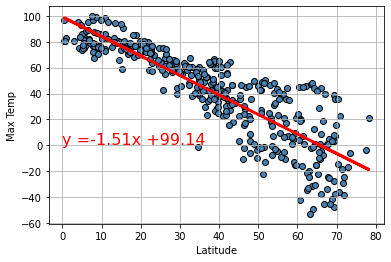

In [28]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_value = norhem_df['Lat']
y_value = norhem_df['Max Temp']
xc = 0
yc = 1

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.5459967771103531


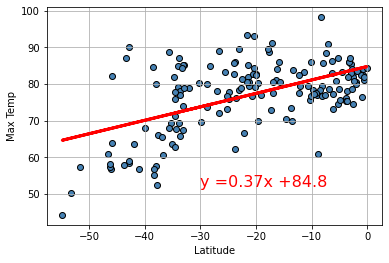

In [29]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_value = sthhem_df['Lat']
y_value = sthhem_df['Max Temp']
xc = -30
yc = 52

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The correlation between latitude and the maximum temperature is strongly negative for the Northern Hemisphere. The further the distance you are away from the equator, the maximum temperature decreases.

Adversely, for the Southern Hemisphere, correlation between latitude and the maximum temperature is strongly positive.
The closer the distance you are to the equator, the maximum temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.5198558621709742


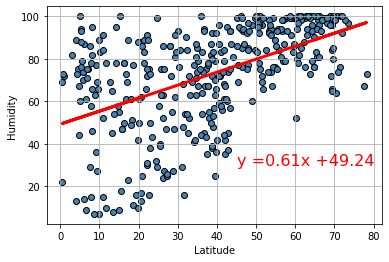

In [30]:
# Northern Hemisphere
# YOUR CODE HERE
x_value = norhem_df['Lat']
y_value = norhem_df['Humidity']
xc = 45
yc = 30

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.23430108931468366


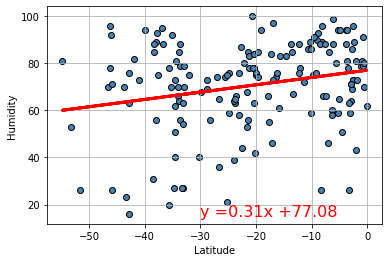

In [31]:
# Southern Hemisphere
# YOUR CODE HERE
x_value = sthhem_df['Lat']
y_value = sthhem_df['Humidity']
xc = -30
yc = 15

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The correlation between latitude and humidity is strongly positive for the Northern Hemisphere. The further the distance you are away from the equator, the humidity increases.

The Southern Hemisphere's correlation between latitude and the is also positive. The closer the distance you are to the equator, the humidity increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.34073391530135927


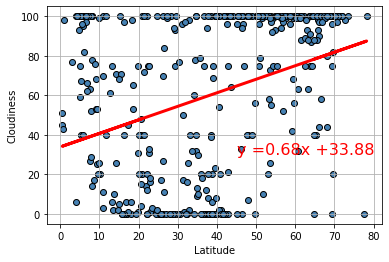

In [32]:
# Northern Hemisphere
# YOUR CODE HERE
x_value = norhem_df['Lat']
y_value = norhem_df['Cloudiness']
xc = 45
yc = 30

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.354385584317767


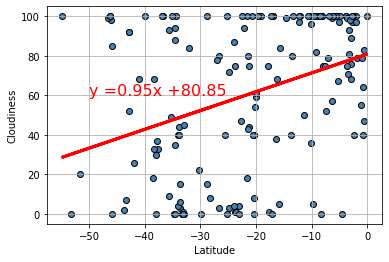

In [35]:
# Southern Hemisphere
# YOUR CODE HERE
x_value = sthhem_df['Lat']
y_value = sthhem_df['Cloudiness']
xc = -50
yc = 60

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The correlation between latitude and cloudiness is strongly positive for both the Northern Hemisphere and Southern Hemisphere. The further the distance you are away from, and the closer you are to the equator the cloudiness increases.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.015531746692923062


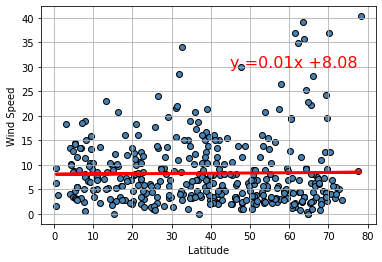

In [36]:
# Northern Hemisphere
# YOUR CODE HERE
x_value = norhem_df['Lat']
y_value = norhem_df['Wind Speed']
xc = 45
yc = 30

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.385122070857803


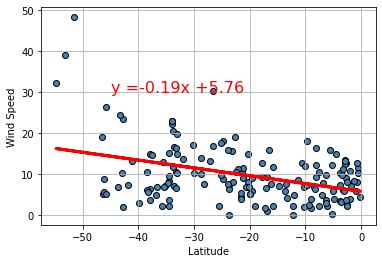

In [37]:
# Southern Hemisphere
# YOUR CODE HERE
x_value = sthhem_df['Lat']
y_value = sthhem_df['Wind Speed']
xc = -45
yc = 30

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

There is no clear correlation between latitude and wind speed for the Northern Hemisphere. The wind speeds stay the same, with a few peak points at high latitudes, despite the distance from the equator.

Adversely, for the Southern Hemisphere, the correlation between latitude and wind speed is strongly negative. The closer the distance you are to the equator, the wind speed decreases.